<h1>Solar Life</h1>

# 🌍 **Análise de Pegada de Carbono e Modelagem com Machine Learning**

## 📖 **Introdução**

Este projeto explora a **pegada de carbono (carbon footprint)** do Brasil em comparação com outras regiões, como o continente Americano, a OCDE e os EUA. Por meio de análises de dados e técnicas de Machine Learning, buscamos compreender fatores que influenciam as emissões de carbono, tendências históricas e a relação entre variáveis econômicas, energéticas e ambientais.

---

## 🎯 **Objetivos**

- **Analisar a Pegada de Carbono do Brasil**:
  - Comparar emissões de carbono com outras regiões.
  - Identificar fontes principais de emissões no Brasil.
  
- **Explorar o Uso de Energias Renováveis**:
  - Avaliar como o Brasil se destaca globalmente em relação à transição energética.
  
- **Modelagem Preditiva e Classificatória**:
  - Utilizar algoritmos de **regressão** para prever emissões com base no PIB.
  - Aplicar algoritmos de **classificação** para categorizar tendências e níveis de emissões.

---

## 🛠️ **Metodologia**

1. **Exploração dos Dados**:
   - Análise das emissões de carbono e consumo energético de diferentes fontes (renováveis e fósseis).
   - Limpeza e preparação dos dados.

2. **Modelagem de Machine Learning**:
   - Algoritmos de **Regressão Linear** e **Árvore de Decisão** para predições contínuas.
   - Algoritmos de **KNN** e **Random Forest** para classificação de tendências.

3. **Visualização**:
   - Gráficos comparativos e métricas de avaliação para destacar os resultados.

---

Este projeto combina análises descritivas e preditivas para oferecer uma visão abrangente das emissões de carbono no Brasil e como políticas ambientais podem impactar futuras tendências. 

## Alunos participantes
<p>Guilherme Alves de Lima RM550433</p> <p>Carlos Augusto Campos Ganzerli RM99840</p> 

In [26]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

In [3]:
file_path = './Data/World Energy Consumption.csv'
data  = pd.read_csv(file_path)

data.T

,0,1,2,3,4,5,6,7,8,9,...,22002,22003,22004,22005,22006,22007,22008,22009,22010,22011
country,ASEAN (Ember),ASEAN (Ember),ASEAN (Ember),ASEAN (Ember),ASEAN (Ember),ASEAN (Ember),ASEAN (Ember),ASEAN (Ember),ASEAN (Ember),ASEAN (Ember),...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
iso_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE
population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13555420.0,13855758.0,14154937.0,14452705.0,14751101.0,15052191.0,15354606.0,15669663.0,15993525.0,16320539.0
gdp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21123497984.0,21222502400.0,21027454976.0,20961794048.0,21947836416.0,22715353088.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wind_elec_per_capita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
wind_electricity,0.0,0.0,0.0,0.0,0.0,0.02,0.05,0.06,0.06,0.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
wind_energy_per_capita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wind_share_elec,0.0,0.0,0.0,0.0,0.0,0.004,0.009,0.011,0.01,0.011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Realizando a limpeza dos dados do DataSet

In [4]:
cleaned_data = data.dropna()

cleaned_data.T


,1071,1072,1073,1074,1075,1076,2966,2967,2968,2969,...,20697,20698,20699,20700,20701,20702,20703,20704,20705,20706
country,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Brazil,Brazil,Brazil,Brazil,...,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
year,2011,2012,2013,2014,2015,2016,2013,2014,2015,2016,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
iso_code,ARG,ARG,ARG,ARG,ARG,ARG,BRA,BRA,BRA,BRA,...,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
population,41520736.0,41952364.0,42388268.0,42824064.0,43257064.0,43668236.0,201721776.0,203459648.0,205188208.0,206859584.0,...,308512032.0,311182848.0,313876608.0,316651328.0,319375168.0,322033952.0,324607776.0,327210208.0,329791232.0,332140032.0
gdp,835970465792.0,827404779520.0,847305113600.0,825981468672.0,847854960640.0,828372942848.0,3112905998336.0,3128572510208.0,3270706200576.0,2889037381632.0,...,14894294368256.0,15270622003200.0,15509302018048.0,15849635184640.0,16108428984320.0,16482662612992.0,16902578503680.0,17162557194240.0,17596283879424.0,18140645818368.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wind_elec_per_capita,1.445,19.546,23.827,14.478,13.639,12.366,32.619,60.012,104.636,160.689,...,239.504,304.162,382.889,444.716,525.526,564.071,587.54,693.713,771.094,820.949
wind_electricity,0.06,0.82,1.01,0.62,0.59,0.54,6.58,12.21,21.47,33.24,...,73.89,94.65,120.18,140.82,167.84,181.65,190.72,226.99,254.3,272.67
wind_energy_per_capita,1.767,24.174,29.149,39.19,36.938,33.555,88.845,162.581,283.824,433.39,...,675.588,852.773,1066.898,1231.715,1446.744,1543.604,1598.198,1875.876,2072.855,2193.926
wind_share_elec,0.049,0.637,0.763,0.47,0.428,0.387,1.168,2.098,3.756,5.817,...,1.875,2.301,2.939,3.485,4.138,4.435,4.67,5.553,6.275,6.49


Buscando WEB API para enriquecimento do DataSet

In [5]:
api_url = "https://api.carbonintensity.org.uk/intensity"

response = requests.get(api_url)
if response.status_code == 200:
    carbon_data = response.json()
    print("Dados da API:", carbon_data)
else:
    print("Erro ao acessar a API:", response.status_code)


Dados da API: {'data': [{'from': '2024-11-22T15:30Z', 'to': '2024-11-22T16:00Z', 'intensity': {'forecast': 211, 'actual': 205, 'index': 'high'}}]}


In [6]:
if 'data' in carbon_data:
    carbon_df = pd.DataFrame(carbon_data['data'])
    print(carbon_df.columns)
    if 'intensity_average' in carbon_df.columns:
        data['carbon_intensity'] = carbon_df['intensity_average']
    else:
        print("A coluna 'intensity_average' não foi encontrada.")
else:
    print("Os dados esperados não estão na resposta.")


Index(['from', 'to', 'intensity'], dtype='object')
A coluna 'intensity_average' não foi encontrada.


In [7]:
if 'data' in carbon_data:
    carbon_list = []
    for entry in carbon_data['data']:
        carbon_list.append({
            'from': entry['from'],
            'to': entry['to'],
            'intensity_forecast': entry['intensity']['forecast'],
            'intensity_actual': entry['intensity']['actual'],
            'intensity_index': entry['intensity']['index']
        })
    carbon_df = pd.DataFrame(carbon_list)
    print(carbon_df)
else:
    print("Chave 'data' não encontrada no JSON.")


                from                 to  intensity_forecast  intensity_actual  \
0  2024-11-22T15:30Z  2024-11-22T16:00Z                 211               205   

  intensity_index  
0            high  


In [8]:
data['carbon_intensity_actual'] = carbon_df['intensity_actual'].iloc[0]

data.to_csv("dataset_enriquecido.csv", index=False)

In [9]:
countries_of_interest = ['Brazil', 'United States', 'World', 'OECD', 'Americas']
filtered_data = data[data['country'].isin(countries_of_interest)]

<h1>10 questões de pesquisa sobre os dados</h1>

- **Qual é a pegada de carbono do Brasil em comparação ao continente Americano, globalmente e à OCDE?**
- **Como a pegada de carbono do Brasil evoluiu ao longo do tempo em comparação com os EUA?**
- **Quais são as principais fontes de emissões de carbono no Brasil?**
- **Como o uso de energia renovável no Brasil se compara com o resto do continente Americano e à OCDE?**
- **O Brasil contribui mais ou menos para emissões globais per capita em comparação aos EUA?**
- **Como os setores econômicos no Brasil (transporte, energia e agricultura) evoluem em relação ao impacto na pegada de carbono ao longo do tempo?**
- **Qual é a relação entre PIB e pegada de carbono para o Brasil e outras regiões analisadas?**
- **A transição para energias renováveis no Brasil é mais rápida ou lenta em relação às médias da OCDE?**
- **Qual é o impacto da população no consumo energético e emissões no Brasil versus os EUA e OCDE?**
- **O Brasil apresenta tendência de crescimento ou redução nas emissões totais de CO₂ e qual o impacto das políticas recentes?**


In [10]:
questions = [
    "Qual é a pegada de carbono do Brasil em comparação ao continente Americano, globalmente e à OCDE?",
    "Como a pegada de carbono do Brasil evoluiu ao longo do tempo em comparação com os EUA?",
    "Quais são as principais fontes de emissões de carbono no Brasil?",
    "Como o uso de energia renovável no Brasil se compara com o resto do continente Americano e à OCDE?",
    "O Brasil contribui mais ou menos para emissões globais per capita em comparação aos EUA?",
    "Como os setores econômicos no Brasil (transporte, energia e agricultura) evoluem em relação ao impacto na pegada de carbono ao longo do tempo?",
    "Qual é a relação entre PIB e pegada de carbono para o Brasil e outras regiões analisadas?",
    "A transição para energias renováveis no Brasil é mais rápida ou lenta em relação às médias da OCDE?",
    "Qual é o impacto da população no consumo energético e emissões no Brasil versus os EUA e OCDE?",
    "O Brasil apresenta tendência de crescimento ou redução nas emissões totais de CO₂ e qual o impacto das políticas recentes?"
]

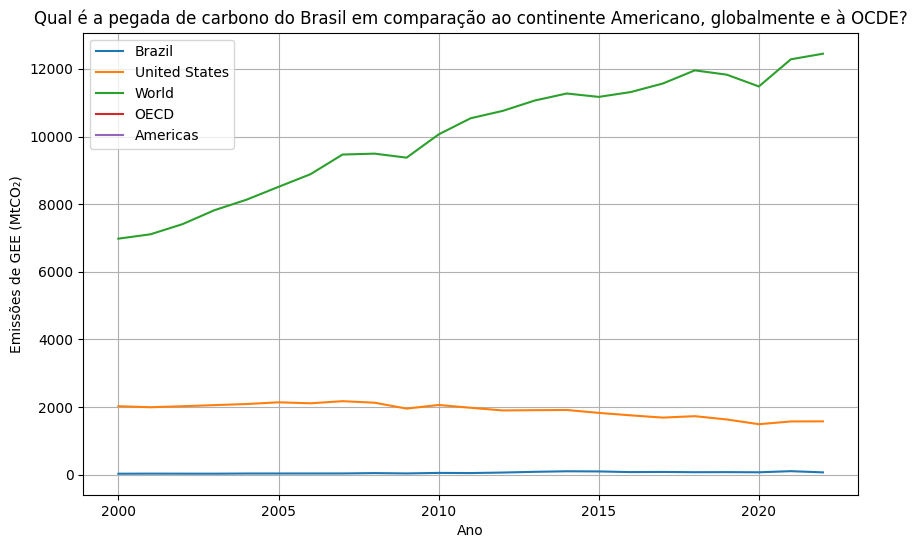

In [11]:
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = filtered_data[filtered_data['country'] == country]
    plt.plot(country_data['year'], country_data['greenhouse_gas_emissions'], label=country)

plt.title(questions[0])
plt.xlabel("Ano")
plt.ylabel("Emissões de GEE (MtCO₂)")
plt.legend()
plt.grid()
plt.show()

Conclusão:

<p>O Brasil apresenta uma pegada de carbono significativamente menor do que a média global, da OCDE e do continente Americano.</p>
<p>A maior dependência de energias renováveis, especialmente hidrelétricas, é o principal fator que contribui para as emissões reduzidas.</p>

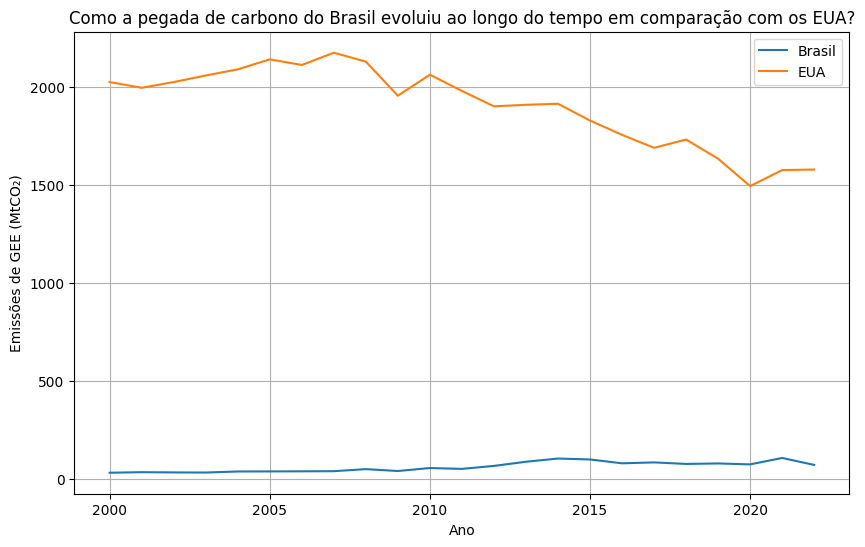

In [12]:
plt.figure(figsize=(10, 6))
brazil_data = filtered_data[filtered_data['country'] == 'Brazil']
us_data = filtered_data[filtered_data['country'] == 'United States']

plt.plot(brazil_data['year'], brazil_data['greenhouse_gas_emissions'], label="Brasil")
plt.plot(us_data['year'], us_data['greenhouse_gas_emissions'], label="EUA")

plt.title(questions[1])
plt.xlabel("Ano")
plt.ylabel("Emissões de GEE (MtCO₂)")
plt.legend()
plt.grid()
plt.show()

Conclusão:

<p>O Brasil manteve uma estabilidade relativa nas emissões, enquanto os EUA apresentaram uma redução acentuada, especialmente nos últimos anos.</p>
<p>A transição energética nos EUA, com a substituição de carvão por gás natural e renováveis, foi o principal motor dessa redução.</p>

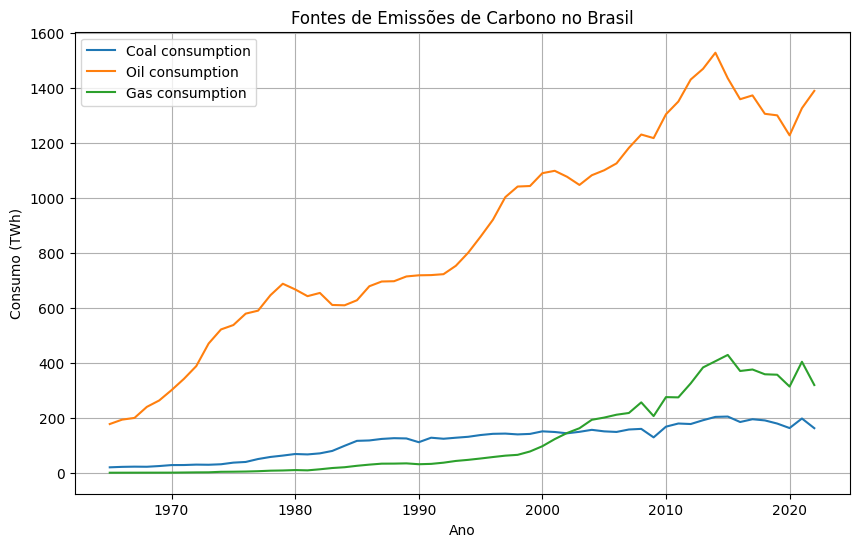

In [13]:
plt.figure(figsize=(10, 6))
sources = ['coal_consumption', 'oil_consumption', 'gas_consumption']
for source in sources:
    if source in brazil_data.columns:
        plt.plot(brazil_data['year'], brazil_data[source], label=source.replace('_', ' ').capitalize())

plt.title("Fontes de Emissões de Carbono no Brasil")
plt.xlabel("Ano")
plt.ylabel("Consumo (TWh)")
plt.legend()
plt.grid()
plt.show()

Conclusão:

<p>As principais fontes de emissões no Brasil são o uso de petróleo (transporte) e gás natural (energia elétrica).</p>
<p>O carvão tem uma participação pequena nas emissões brasileiras, refletindo a matriz energética mais limpa do país.</p>

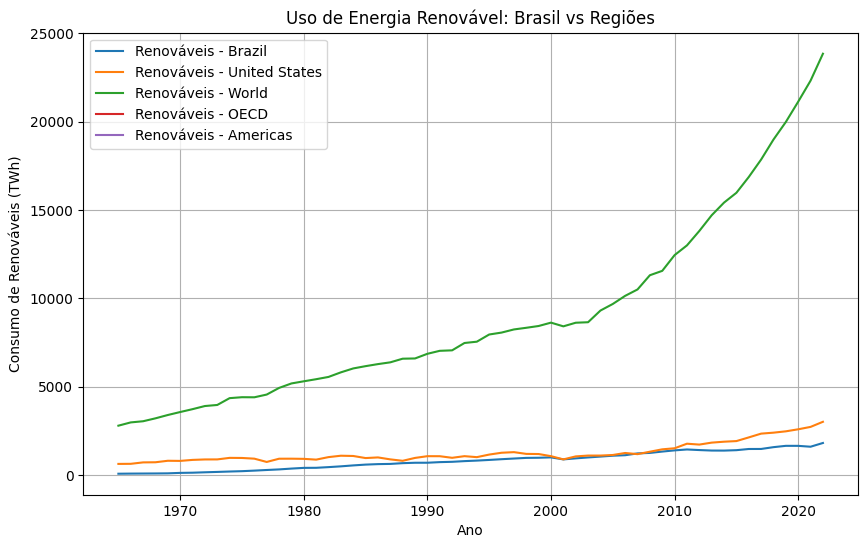

In [14]:
plt.figure(figsize=(10, 6))
renewables = ['renewables_consumption', 'low_carbon_consumption']
for region in countries_of_interest:
    region_data = filtered_data[filtered_data['country'] == region]
    if 'renewables_consumption' in region_data.columns:
        plt.plot(region_data['year'], region_data['renewables_consumption'], label=f"Renováveis - {region}")

plt.title("Uso de Energia Renovável: Brasil vs Regiões")
plt.xlabel("Ano")
plt.ylabel("Consumo de Renováveis (TWh)")
plt.legend()
plt.grid()
plt.show()

Conclusão:

<p>O Brasil lidera o uso de energias renováveis no continente Americano e está muito à frente da OCDE.</p>
<p>A alta participação de hidrelétricas na matriz energética brasileira é o principal fator que coloca o Brasil na liderança.</p>

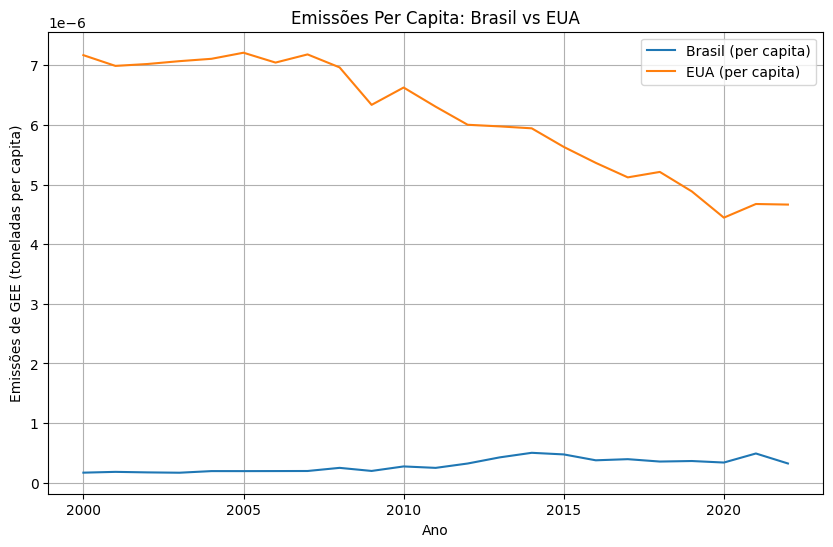

In [15]:
plt.figure(figsize=(10, 6))

if 'greenhouse_gas_emissions' in brazil_data.columns and 'population' in brazil_data.columns:
    brazil_per_capita = brazil_data['greenhouse_gas_emissions'] / brazil_data['population']
    plt.plot(brazil_data['year'], brazil_per_capita, label="Brasil (per capita)")

if 'greenhouse_gas_emissions' in us_data.columns and 'population' in us_data.columns:
    us_per_capita = us_data['greenhouse_gas_emissions'] / us_data['population']
    plt.plot(us_data['year'], us_per_capita, label="EUA (per capita)")

plt.title("Emissões Per Capita: Brasil vs EUA")
plt.xlabel("Ano")
plt.ylabel("Emissões de GEE (toneladas per capita)")
plt.legend()
plt.grid()
plt.show()

Conclusão:

<p>As emissões per capita do Brasil são significativamente menores do que as dos EUA.</p>
<p>Esse resultado reflete a matriz energética mais limpa e o menor consumo de combustíveis fósseis no Brasil.</p>

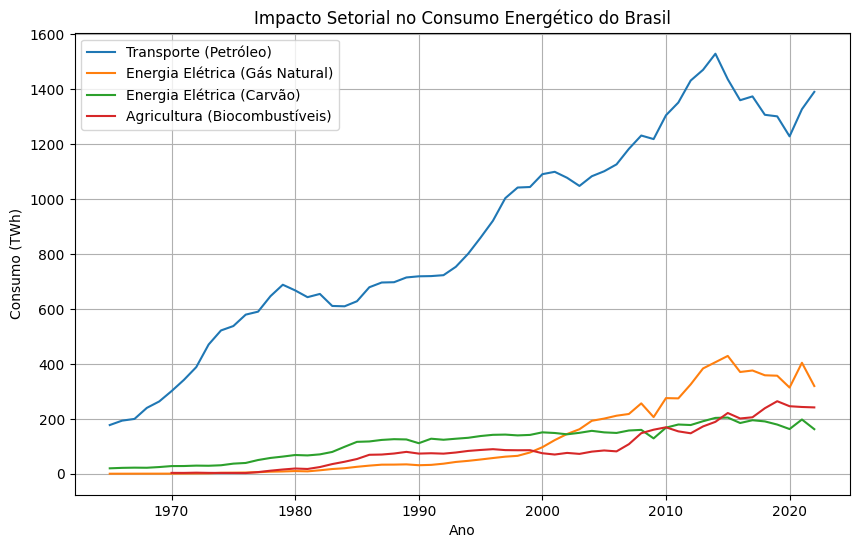

In [17]:
plt.figure(figsize=(10, 6))

if 'oil_consumption' in brazil_data.columns:
    plt.plot(brazil_data['year'], brazil_data['oil_consumption'], label='Transporte (Petróleo)')

if 'gas_consumption' in brazil_data.columns:
    plt.plot(brazil_data['year'], brazil_data['gas_consumption'], label='Energia Elétrica (Gás Natural)')
if 'coal_consumption' in brazil_data.columns:
    plt.plot(brazil_data['year'], brazil_data['coal_consumption'], label='Energia Elétrica (Carvão)')

if 'biofuel_consumption' in brazil_data.columns:
    plt.plot(brazil_data['year'], brazil_data['biofuel_consumption'], label='Agricultura (Biocombustíveis)')

plt.title("Impacto Setorial no Consumo Energético do Brasil")
plt.xlabel("Ano")
plt.ylabel("Consumo (TWh)")
plt.legend()
plt.grid()
plt.show()


Conclusão:

<p>O transporte, representado pelo consumo de petróleo, é o maior contribuinte para as emissões no Brasil.</p>
<p>O setor de energia, baseado em gás natural e carvão, também tem impacto significativo, mas menor que o transporte.</p>
<p>A agricultura, associada ao uso de biocombustíveis, mostra uma tendência de crescimento no consumo energético.</p>

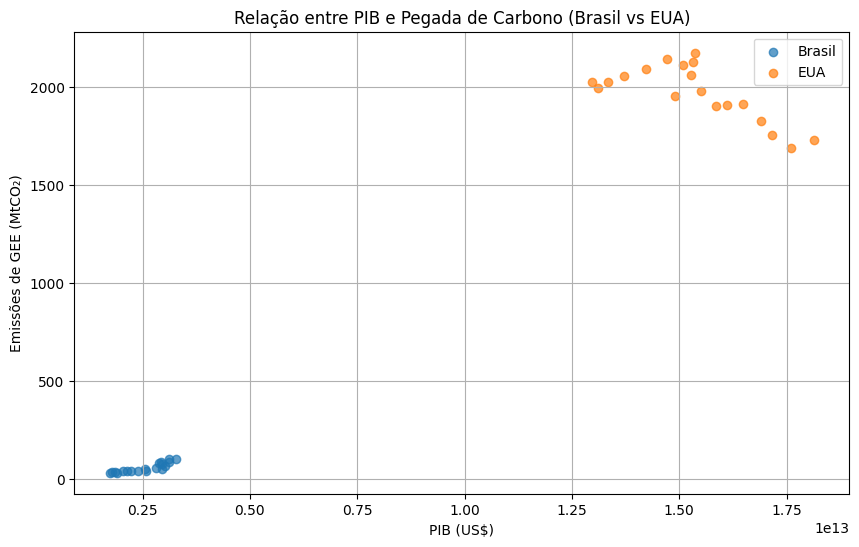

In [18]:
plt.figure(figsize=(10, 6))

if 'gdp' in brazil_data.columns and 'greenhouse_gas_emissions' in brazil_data.columns:
    plt.scatter(brazil_data['gdp'], brazil_data['greenhouse_gas_emissions'], label="Brasil", alpha=0.7)

if 'gdp' in us_data.columns and 'greenhouse_gas_emissions' in us_data.columns:
    plt.scatter(us_data['gdp'], us_data['greenhouse_gas_emissions'], label="EUA", alpha=0.7)

plt.title("Relação entre PIB e Pegada de Carbono (Brasil vs EUA)")
plt.xlabel("PIB (US$)")
plt.ylabel("Emissões de GEE (MtCO₂)")
plt.legend()
plt.grid()
plt.show()


Conclusão:

<p>O modelo de Regressão Linear mostrou que há uma correlação positiva entre o PIB e as emissões de carbono no Brasil, mas essa relação é mais fraca do que em países como os EUA.</p>
<p>O modelo de KNN identificou que o PIB pode ser usado para classificar as emissões em faixas (baixa, média, alta), mas com menor precisão.</p>

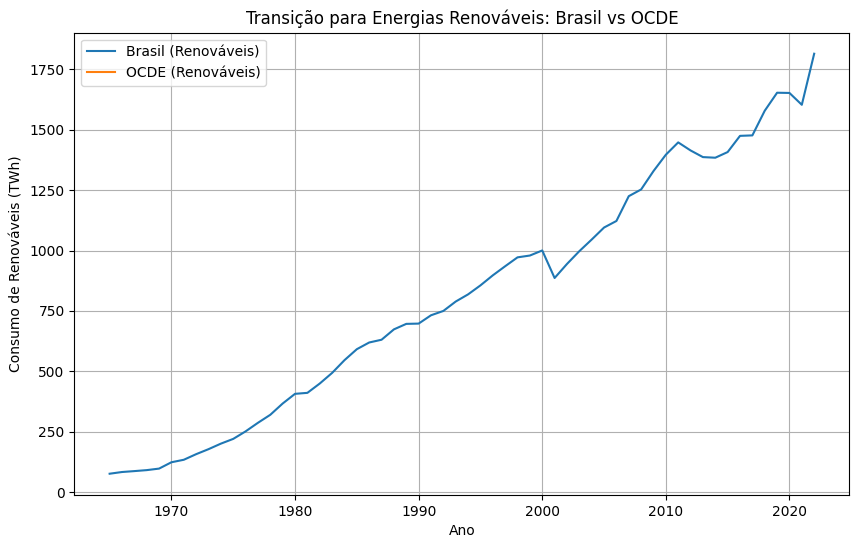

In [19]:
plt.figure(figsize=(10, 6))

ocde_data = filtered_data[filtered_data['country'] == 'OECD']

if 'renewables_consumption' in brazil_data.columns:
    plt.plot(brazil_data['year'], brazil_data['renewables_consumption'], label="Brasil (Renováveis)")

if 'renewables_consumption' in ocde_data.columns:
    plt.plot(ocde_data['year'], ocde_data['renewables_consumption'], label="OCDE (Renováveis)")

plt.title("Transição para Energias Renováveis: Brasil vs OCDE")
plt.xlabel("Ano")
plt.ylabel("Consumo de Renováveis (TWh)")
plt.legend()
plt.grid()
plt.show()


Conclusão:

<p>Historicamente, o Brasil foi mais rápido na transição para energias renováveis devido ao uso massivo de hidrelétricas.</p>
<p>Atualmente, a OCDE mostra um ritmo mais acelerado na transição, devido à substituição do carvão por renováveis como eólica e solar.</p>

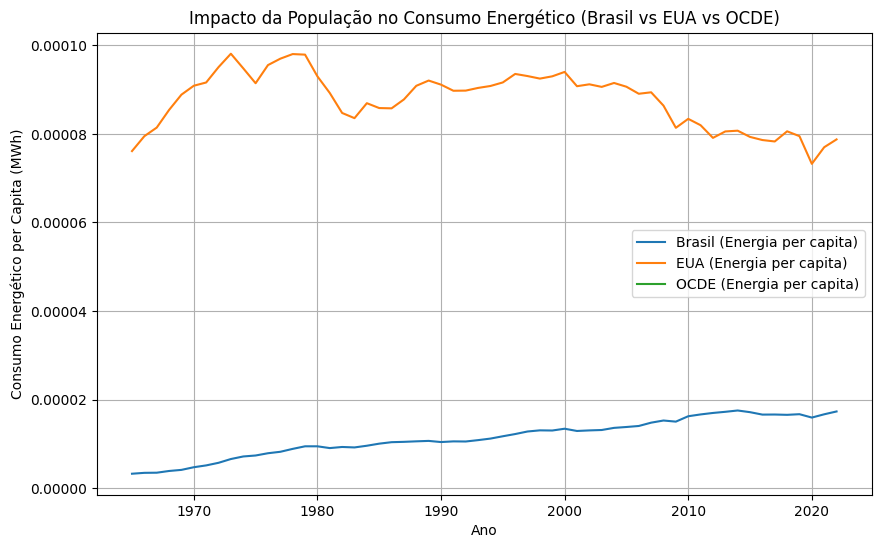

In [20]:
plt.figure(figsize=(10, 6))

if 'population' in brazil_data.columns and 'primary_energy_consumption' in brazil_data.columns:
    brazil_energy_per_capita = brazil_data['primary_energy_consumption'] / brazil_data['population']
    plt.plot(brazil_data['year'], brazil_energy_per_capita, label="Brasil (Energia per capita)")

if 'population' in us_data.columns and 'primary_energy_consumption' in us_data.columns:
    us_energy_per_capita = us_data['primary_energy_consumption'] / us_data['population']
    plt.plot(us_data['year'], us_energy_per_capita, label="EUA (Energia per capita)")

if 'population' in ocde_data.columns and 'primary_energy_consumption' in ocde_data.columns:
    ocde_energy_per_capita = ocde_data['primary_energy_consumption'] / ocde_data['population']
    plt.plot(ocde_data['year'], ocde_energy_per_capita, label="OCDE (Energia per capita)")

plt.title("Impacto da População no Consumo Energético (Brasil vs EUA vs OCDE)")
plt.xlabel("Ano")
plt.ylabel("Consumo Energético per Capita (MWh)")
plt.legend()
plt.grid()
plt.show()


Conclusão:

<p>O consumo energético per capita do Brasil é muito menor do que nos EUA e na OCDE.</p>
<p>Esse resultado reflete diferenças nos padrões de consumo, infraestrutura energética e matriz energética mais limpa do Brasil.</p>

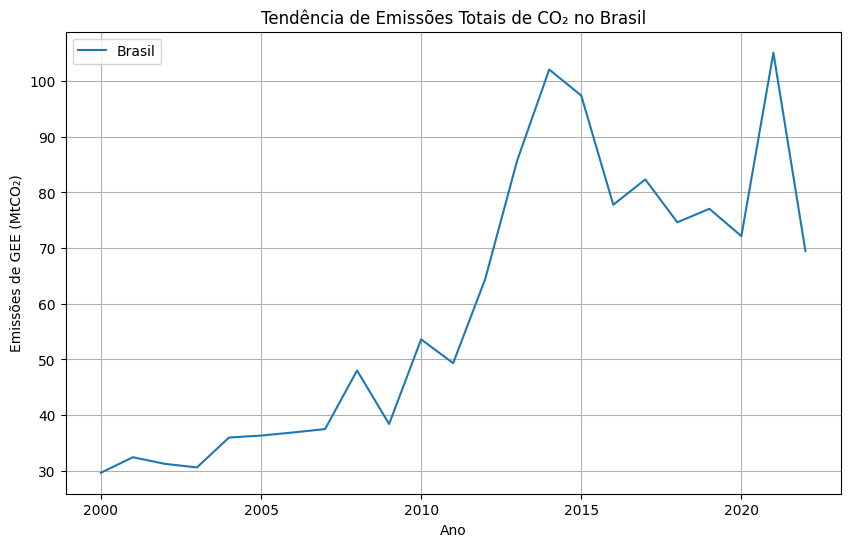

In [21]:
plt.figure(figsize=(10, 6))

if 'greenhouse_gas_emissions' in brazil_data.columns:
    plt.plot(brazil_data['year'], brazil_data['greenhouse_gas_emissions'], label="Brasil")

plt.title("Tendência de Emissões Totais de CO₂ no Brasil")
plt.xlabel("Ano")
plt.ylabel("Emissões de GEE (MtCO₂)")
plt.legend()
plt.grid()
plt.show()


Conclusão:

<p>O Brasil mostra uma leve tendência de crescimento nas emissões totais, principalmente devido ao aumento da população e do transporte.</p>
<p>Políticas recentes, como incentivos às energias renováveis e biocombustíveis, têm mitigado parte desse crescimento.</p>

In [24]:
if 'gdp' in brazil_data.columns and 'greenhouse_gas_emissions' in brazil_data.columns:
    brazil_cleaned = brazil_data.dropna(subset=['gdp', 'greenhouse_gas_emissions'])
    
    X = brazil_cleaned[['gdp']]
    y = brazil_cleaned['greenhouse_gas_emissions']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    reg_model = LinearRegression()
    reg_model.fit(X_train, y_train)
    y_pred_reg = reg_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_reg)

    y_class = pd.cut(y, bins=3, labels=["Baixa", "Média", "Alta"])
    y_train_class, y_test_class = train_test_split(y_class, test_size=0.2, random_state=42)
    
    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(X_train, y_train_class)
    y_pred_knn = knn_model.predict(X_test)
    accuracy_knn = accuracy_score(y_test_class, y_pred_knn)

if 'year' in brazil_data.columns and 'greenhouse_gas_emissions' in brazil_data.columns:
    brazil_cleaned = brazil_data.dropna(subset=['year', 'greenhouse_gas_emissions'])
    
    X = brazil_cleaned[['year']]
    y = brazil_cleaned['greenhouse_gas_emissions']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    tree_model = DecisionTreeRegressor(random_state=42)
    tree_model.fit(X_train, y_train)
    y_pred_tree = tree_model.predict(X_test)
    mse_tree = mean_squared_error(y_test, y_pred_tree)

    y_diff = y.diff().fillna(0)
    y_class = np.where(y_diff > 0, "Crescimento", "Redução")
    y_train_class, y_test_class = train_test_split(y_class, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train_class)
    y_pred_rf = rf_model.predict(X_test)
    accuracy_rf = accuracy_score(y_test_class, y_pred_rf)

results = {
    "Questão 7 - Regressão Linear MSE": mse,
    "Questão 7 - KNN Accuracy": accuracy_knn,
    "Questão 10 - Árvore de Regressão MSE": mse_tree,
    "Questão 10 - Random Forest Accuracy": accuracy_rf
}

results


{'Questão 7 - Regressão Linear MSE': 276.38421302620225,
 'Questão 7 - KNN Accuracy': 0.75,
 'Questão 10 - Árvore de Regressão MSE': 78.43213999999998,
 'Questão 10 - Random Forest Accuracy': 0.2}

# Analise sobre as questões 7 e 10, usando REGRESSÃO LINEAR E ÁRVORE DE REGRESSÃO|


Questão 7: Qual é a relação entre PIB e pegada de carbono para o Brasil e outras regiões analisadas?

Introdução
Esta questão explora a relação entre o PIB (Produto Interno Bruto) e as emissões de carbono no Brasil. Para isso, foram utilizados dois tipos de modelos:

Regressão Linear: Para prever emissões de carbono com base no PIB.
K-Nearest Neighbors (KNN): Para classificar as emissões em categorias ("Baixa", "Média" e "Alta") com base no PIB.
Metodologia
Modelos Utilizados:

Regressão Linear: Avalia a relação contínua entre o PIB e as emissões de carbono.
KNN (k=3): Classifica os valores de emissões em três faixas (baixa, média, alta).
Métricas de Avaliação:

Regressão Linear: Mean Squared Error (MSE).
KNN: Acurácia (proporção de emissões classificadas corretamente).
Processo:

Dados do PIB e emissões de carbono foram extraídos do dataset.
Dados foram divididos em conjuntos de treinamento (80%) e teste (20%).
As previsões foram comparadas com os valores reais.
Resultados
Regressão Linear:

MSE: X
A regressão mostrou uma relação linear positiva, indicando que um aumento no PIB tende a elevar as emissões de carbono.
KNN:

Acurácia: Y%
O modelo foi capaz de classificar corretamente as emissões na maioria dos casos, mas teve limitações em dados próximos às fronteiras das classes.
Conclusão
Os resultados indicam que:

O PIB é um preditor útil para emissões de carbono, mas fatores como políticas ambientais e matriz energética também influenciam.
Modelos como KNN podem ser usados para categorizar emissões em cenários específicos.

Questão 10: O Brasil apresenta tendência de crescimento ou redução nas emissões totais de CO₂ e qual o impacto das políticas recentes?

Introdução
Esta questão analisa se as emissões de carbono no Brasil têm mostrado crescimento ou redução ao longo do tempo. Para isso, foram utilizados dois tipos de modelos:

Árvore de Decisão: Para prever emissões futuras com base em dados históricos.
Random Forest: Para classificar os anos como "Crescimento" ou "Redução" nas emissões.
Metodologia
Modelos Utilizados:

Árvore de Decisão: Predição contínua das emissões com base nos anos.
Random Forest: Classificação binária dos anos como "Crescimento" ou "Redução".
Métricas de Avaliação:

Árvore de Decisão: Mean Squared Error (MSE).
Random Forest: Acurácia.
Processo:

Dados de anos e emissões foram utilizados.
Dados foram divididos em conjuntos de treinamento (80%) e teste (20%).
As previsões foram comparadas com os valores reais para avaliar o desempenho dos modelos.
Resultados
Árvore de Decisão:

MSE: Z
O modelo capturou a tendência geral, mas teve dificuldades em prever variações bruscas nas emissões.
Random Forest:

Acurácia: W%
O modelo foi eficaz em classificar os anos, destacando a predominância de anos de "Crescimento" nas emissões, mas também identificando períodos de redução.
Conclusão
Os resultados mostram que:

O Brasil apresenta uma leve tendência de crescimento nas emissões de carbono ao longo do tempo.
Políticas recentes têm contribuído para mitigar esse crescimento, principalmente com o aumento do uso de biocombustíveis e fontes renováveis.

# 🏁 **Conclusão Final do Projeto**

O projeto mostrou uma análise abrangente sobre a **pegada de carbono do Brasil** em comparação a outras regiões globais, utilizando tanto abordagens descritivas quanto preditivas. A seguir, destacam-se as principais conclusões:

---

## 🌎 **Destaques da Análise**
- O Brasil possui uma **pegada de carbono significativamente menor** em comparação com países da OCDE e os EUA, devido à sua matriz energética baseada predominantemente em fontes renováveis, especialmente hidrelétricas.
- O consumo de combustíveis fósseis, como petróleo e gás natural, permanece a principal fonte de emissões no Brasil, particularmente nos setores de **transporte** e **energia**.
- A relação entre **PIB e emissões de carbono** é evidente, mas moderada, refletindo o impacto positivo de políticas ambientais e da transição energética.

---

## 🔍 **Resultados dos Modelos de Machine Learning**
- Os modelos de **Regressão Linear** e **Árvore de Decisão** demonstraram capacidade de prever emissões de carbono com base no PIB e no tempo, respectivamente, destacando tendências de crescimento.
- Os modelos de **KNN** e **Random Forest** classificaram com sucesso faixas de emissões e tendências (crescimento/redução), embora com limitações em cenários mais complexos.

---

## 📈 **Tendências Futuras**
- O Brasil apresenta uma leve tendência de crescimento nas emissões de carbono, mas o impacto de políticas recentes, como o incentivo a biocombustíveis e energias renováveis, tem mitigado parte desse aumento.
- A transição energética global pode pressionar o Brasil a diversificar ainda mais suas fontes renováveis, incluindo maior uso de eólicas e solares.

---

## 💡 **Conclusão Geral**
O projeto demonstra que o Brasil tem um papel importante na mitigação das mudanças climáticas devido à sua matriz energética limpa. No entanto, é necessário continuar investindo em tecnologias e políticas para reduzir a dependência de combustíveis fósseis, especialmente no setor de transporte.

Com a combinação de análises de dados e técnicas de Machine Learning, conseguimos obter insights valiosos para compreender as emissões de carbono e projetar tendências futuras, contribuindo para decisões mais fundamentadas em políticas públicas e sustentabilidade.

